<a href="https://colab.research.google.com/github/goldenboy0111/cigarette_butt_detector/blob/main/cigarette_butt_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1 :** Clone the YOLOv5 repository

In [5]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5


fatal: destination path 'yolov5' already exists and is not an empty directory.
/content/yolov5


**Step 2 :** Install dependencies

In [6]:
!pip install -r requirements.txt


**Step 3:** Import dataset file from Google Drive

In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**Step 4:** Define path to dataset.yaml

In [8]:
dataset_yaml = '/content/drive/MyDrive/dataset/custom_data.yaml'

**Step 5 :** YOLOv5 model Training

In [9]:
!python train.py --img 640 --batch 8 --epochs 50 --data /content/drive/MyDrive/dataset/custom_data.yaml --weights yolov5s.pt --cache --single-cls

2024-07-22 10:07:08.316274: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 10:07:08.316327: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 10:07:08.405937: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/dataset/custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_

**Step 6 :** Upload a picture to test

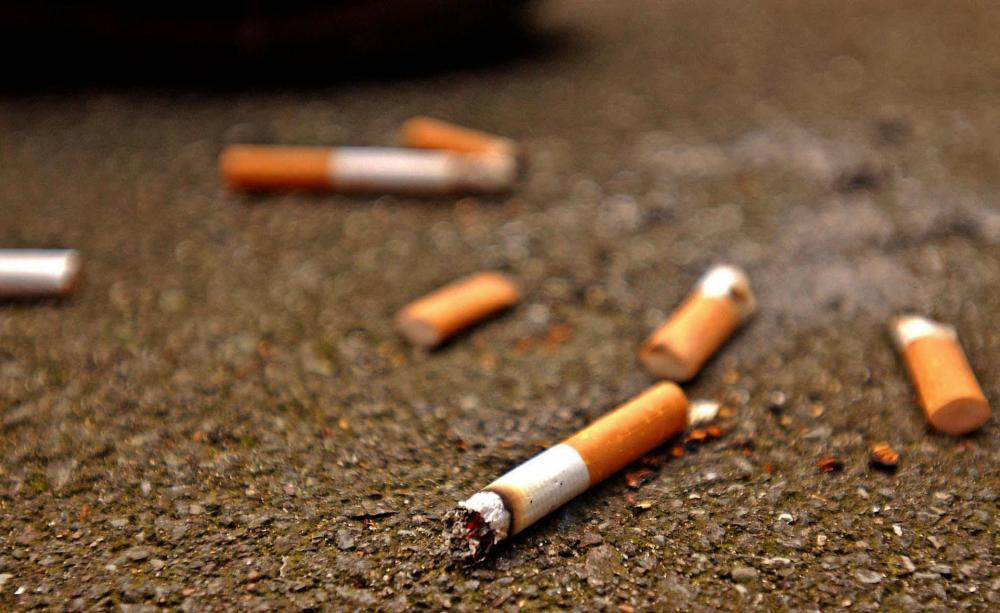

In [10]:
from IPython.display import Image, display

display(Image(filename='/content/image24.jpg'))

**Step 7 :** Run code to detect

In [12]:
import os

print(os.listdir('/content/yolov5/runs/train/exp/weights'))


['best.pt', 'last.pt']


In [16]:
!python detect.py --weights /content/yolov5/runs/train/exp/weights/best.pt --img 640 --conf 0.5 --source /content/image24.jpg

detect: weights=['/content/yolov5/runs/train/exp/weights/best.pt'], source=/content/image24.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-345-g8003649c Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/image24.jpg: 416x640 6 butts, 47.5ms
Speed: 0.5ms pre-process, 47.5ms inference, 565.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


['image24.jpg']


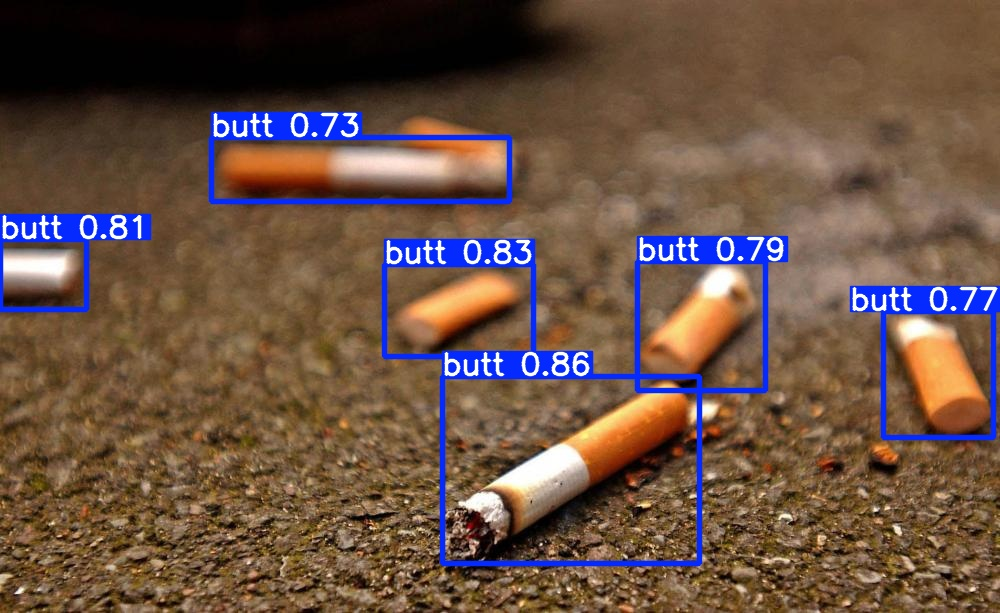

In [17]:
detect_dir = '/content/yolov5/runs/detect/exp3'
detect_files = os.listdir(detect_dir)
print(detect_files)

# Display the detection result
from IPython.display import Image, display
display(Image(filename=f'{detect_dir}/{detect_files[0]}'))